<a href="https://colab.research.google.com/github/Abhi1415/Rhyme/blob/master/UnivarLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,10)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
uploaded = files.upload()

Saving bike_sharing_data.csv to bike_sharing_data (2).csv


In [4]:
df = pd.read_csv('bike_sharing_data.csv')
df.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


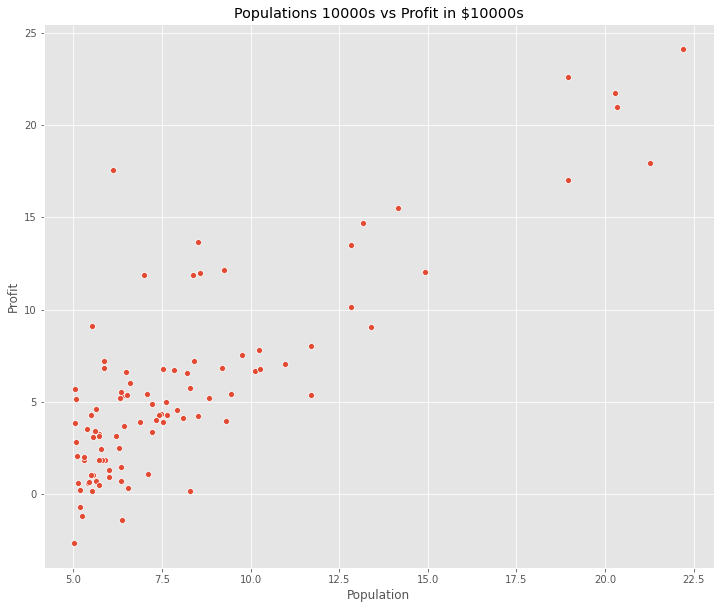

In [6]:
ax = sns.scatterplot(df['Population'], df['Profit'])
ax.set_title('Populations 10000s vs Profit in $10000s');

**COST FUNCTION**

In [0]:
def cost_function(X, theta, y):
  h = X.dot(theta)
  error = h-y
  cost = error.T .dot(error)
  cost  = np.sum(cost)
  m = len(y)
  cost = cost/(2*m)

  return cost

In [8]:
m= df.Population.values.size
X = np.append(np.ones((m,1)), df.Population.values.reshape(m,1), axis=1)
y= df.Profit.values.reshape(m,1)
theta = np.zeros((2,1))

print(cost_function(X, theta, y))

32.072733877455676


**GRADIENT DESCENT**

In [0]:
def gradient_descent (X, theta, y, alpha, iterations):
  cost_hist =[]
  itera = []
  for i in range(iterations):
    theta_temp = theta - (alpha/len(y))*(X.T.dot(X.dot(theta)-y))
    theta = theta_temp
    itera = itera + [i]
    cost_hist = cost_hist + [cost_function(X, theta, y)]
  return theta, cost_hist, itera

In [0]:
theta, cost_hist, itera = gradient_descent(X, theta, y, alpha=0.01, iterations=500)

**Visualising the Cost Function $J(\Theta)$**

In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i], theta_1[j]])
    cost_values[i,j] = cost_function(X, t, y)

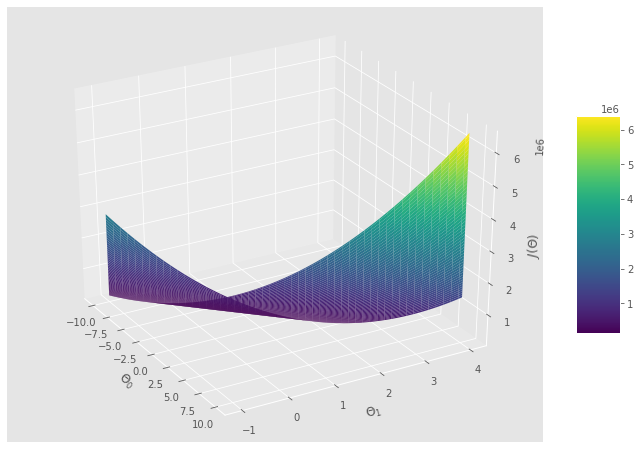

In [13]:
fig = plt.figure(figsize= (12,8))
ax = fig.gca(projection = '3d')

surface = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surface, shrink=0.5, aspect= 5)

plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_zlabel('$J(\Theta)$')
ax.view_init(30,330)

plt.show()

**Plotting the Convergence**

Text(0.5, 1.0, 'Values of Cost function over the time')

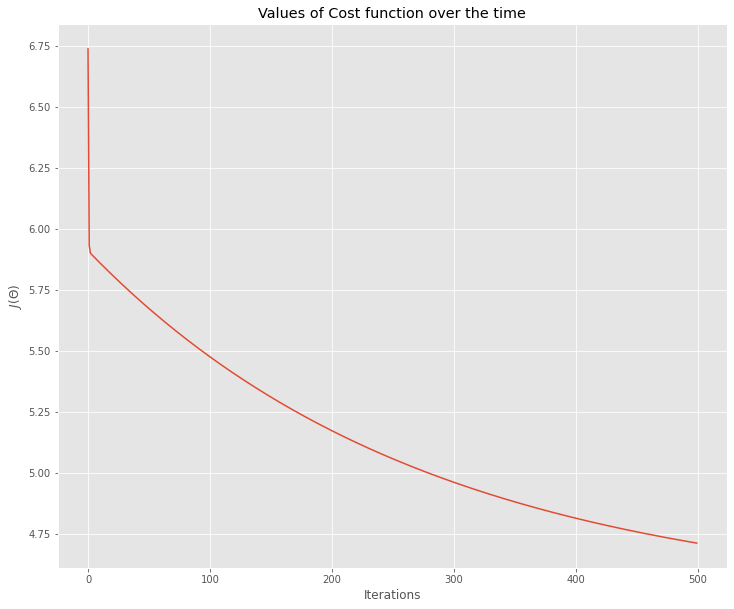

In [14]:
plt.plot(cost_hist)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')
plt.title('Values of Cost function over the time')

**Visualising final obtained theta with the Scatter Plot**

In [15]:
theta, theta.shape

(array([[-2.28286727],
        [ 1.03099898]]), (2, 1))

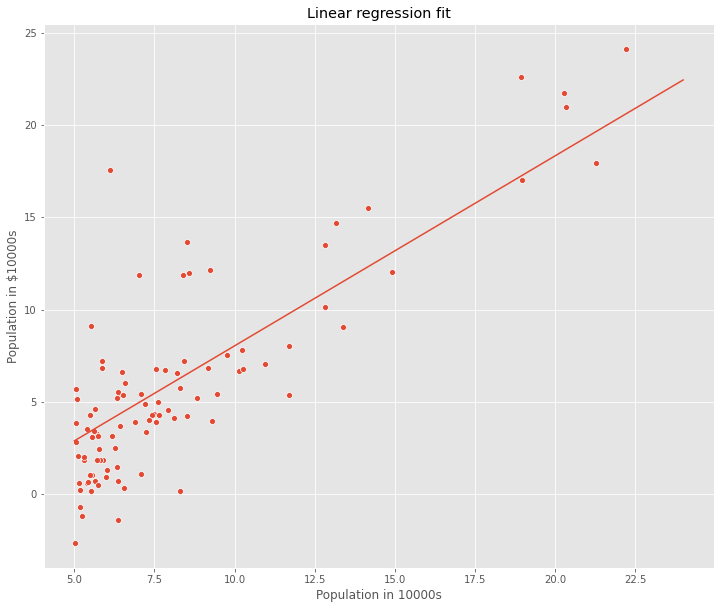

In [16]:
theta = np.squeeze(theta)
sns.scatterplot(df['Population'], df['Profit'])

x_value = [x for x in range(5,25)]
y_value = [(x*theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel('Population in 10000s')
plt.ylabel('Population in $10000s')
plt.title('Linear regression fit');

**Inference Using the optimized $\Theta$ values**

$h_{\Theta}(x) = \Theta^Tx$

In [0]:
def predict(X, theta):
  y_pred = theta.T.dot(X)
  return y_pred

In [20]:
y_pred_1 = predict(np.array([1,5]), theta)
print('The expected profit for a population of 50k is: ${}'.format(y_pred_1*10000))

The expected profit for a population of 50k is: $28721.276137995847
